Epoch 1, Traing loss  12631.19, Validation loss  15409.33
Epoch 2, Traing loss  6875.02, Validation loss  8566.86
Epoch 3, Traing loss  3744.68, Validation loss  4532.55
Epoch 1000, Traing loss  0.45, Validation loss  0.50
Epoch 2000, Traing loss  0.23, Validation loss  0.24
Epoch 3000, Traing loss  0.20, Validation loss  0.21
Epoch 4000, Traing loss  0.19, Validation loss  0.19
Epoch 5000, Traing loss  0.17, Validation loss  0.17
tensor([ 0.5981, -0.2749,  0.0262, -0.0344], requires_grad=True)


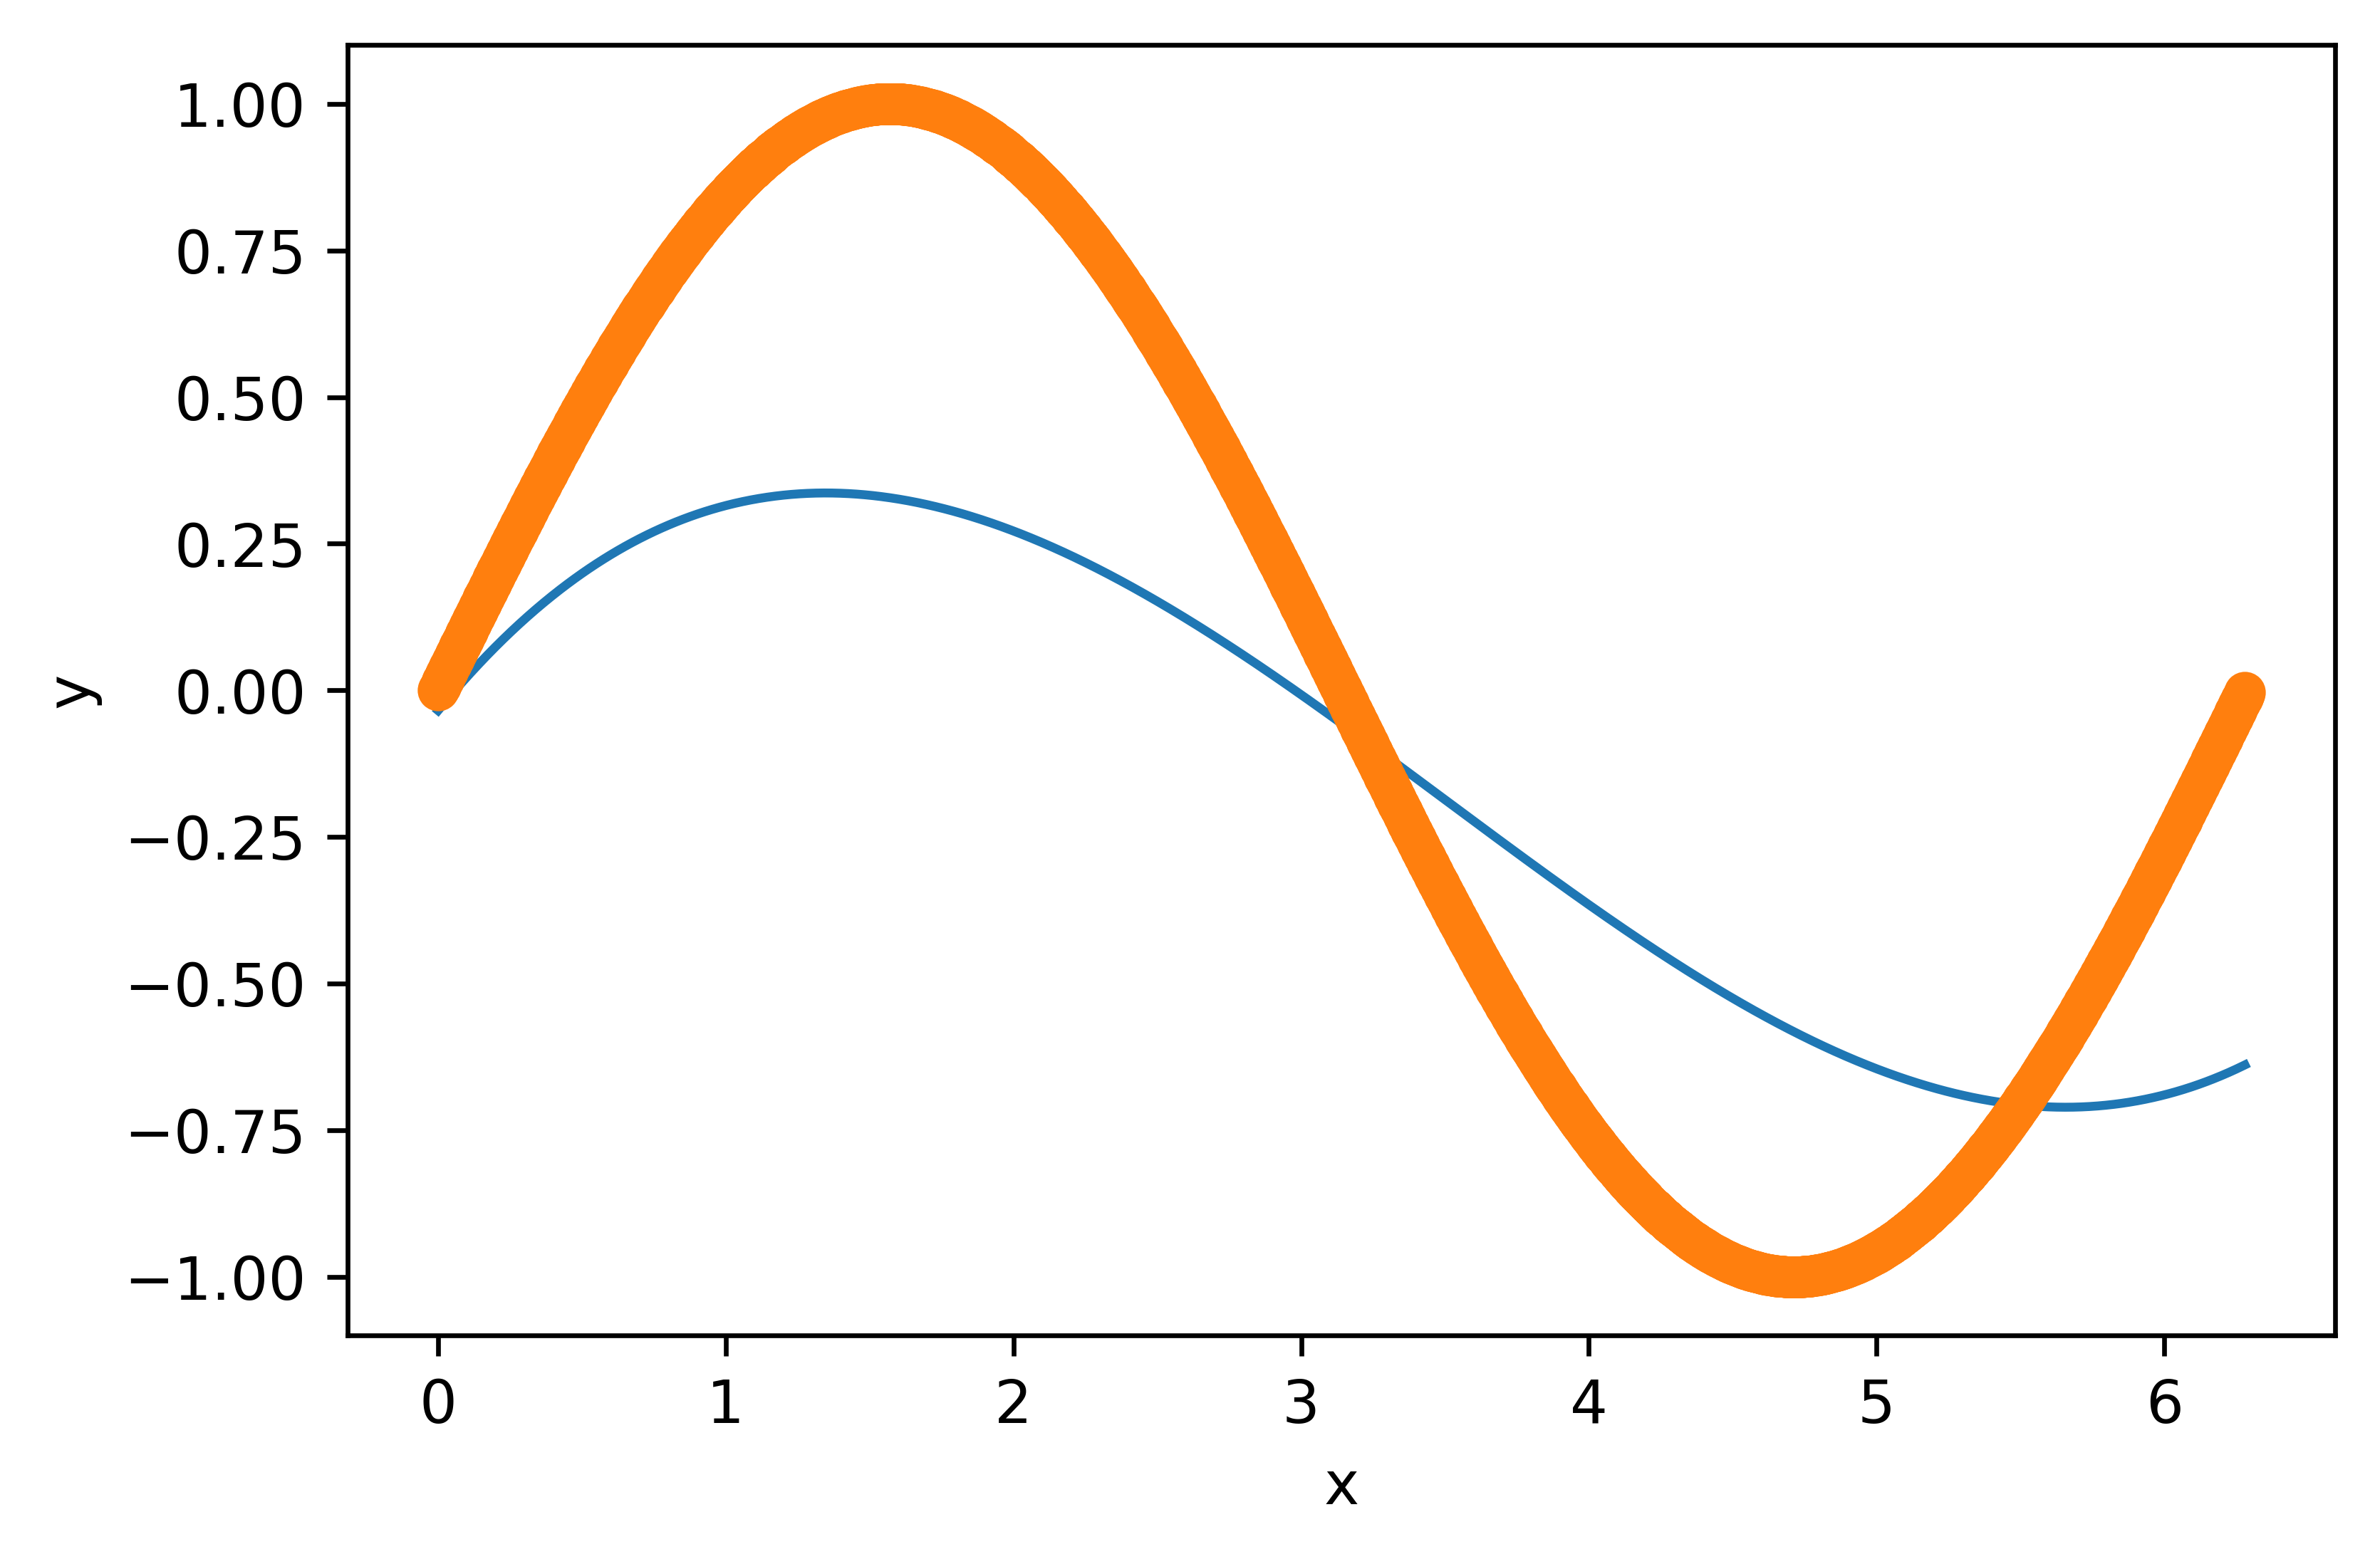

In [6]:
import torch
import torch.optim as optim
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

n_epochs = 5000
e_print = 1000
n_samples = 2000

#三次函数回归

t_u = np.arange(0., 2 * np.pi, 2 * np.pi / n_samples)
t_c = np.sin(t_u)
t_u = torch.tensor(t_u).float().unsqueeze(1)
t_c = torch.tensor(t_c).float().unsqueeze(1)


#随机获取训练集与验证集索引
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

#根据索引划分训练集与验证集
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

#定义模型
def model(t_u, w1, w2, w3, b):
    return (w1 * t_u + w2 * (t_u**2) + w3 * (t_u**3) + b)

#定义损失函数
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

#定义前向传播
def calc_forward(t_u, t_c, is_train): #is_train用来设定是否自动求导
    with torch.set_grad_enabled(is_train):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
    return loss

#定义训练器
def training_loop(n_epochs, optimizer, params, e_print,
                  train_t_u, val_t_u, train_t_c, val_t_c):
        for epoch in range(1, n_epochs + 1):
            train_loss = calc_forward(train_t_u, train_t_c, True)
            val_loss = calc_forward(val_t_u, val_t_c, False)
            
            optimizer.zero_grad() #梯度清零
            train_loss.backward() #反向传播
            optimizer.step() #更新参数
                              
            if epoch <= 3 or epoch % e_print == 0:
                print('Epoch %d, Traing loss % .2f, Validation loss % .2f'%(
                    epoch, float(train_loss), float(val_loss)))
        return params

#初始化参数并激活梯度
params = torch.tensor([1., 1., 1., 0.], requires_grad = True) 
#设置学习率
learning_rate = 1e-4 
#设定优化器
optimizer = optim.SGD([params], lr = learning_rate) 

#进行训练
training_loop(
    n_epochs = n_epochs,
    optimizer = optimizer,
    params = params,
    e_print = e_print,
    train_t_u = train_t_u,
    val_t_u = val_t_u,
    train_t_c = train_t_c,
    val_t_c = val_t_c)

print(params)
t_p = model(t_u, *params)
fig = plt.figure(dpi = 600)
plt.xlabel('x')
plt.ylabel('y')

plt.plot(t_u.numpy(), t_p.detach().numpy()) 
plt.plot(t_u.numpy(), t_c.numpy(), 'o')